# Define missingness assumptions for (static) dataset
In order to resolve missingness, we need to define assumptions how the missingness is created. We encode these assumptions in a MissingDataGraph that we define in this notebook and save it for further analysis

__Note__: If the available dataset is fully observed, and you want to inject synthetic missingness, please see `preparation03_missingness_injection` instead. It also saves the ground truth m_graph. 

In [1]:
%load_ext autoreload
%autoreload 2

### Define paths 

In [3]:
from afa.configurations.utils_static import specify_default_paths_static
# which dataset to work on 
dataset_name   = "synthetic_1"

# name for of missingness scenario 
miss_scenario  = 'MNAR_1'

# original data paths
paths_gt = specify_default_paths_static(dataset_name = dataset_name , miss_scenario = None) 

# new missing data paths (NOT SURE IF THIS MAKES SENSE HERE)
paths_miss = specify_default_paths_static(dataset_name = dataset_name , miss_scenario = miss_scenario) 

## Load dataset with missingness 
At first, we want to load the dataset 

Includes loading: 
- superfeature mapping
- problem
- afa_problem 

In [4]:
from afa.data_modelling.datasets.data_loader.data_loader_static import DataLoader_static

2023-02-18 23:44:40.353593: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-18 23:44:40.479886: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-18 23:44:40.479903: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-18 23:44:41.138432: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [5]:
# load dataset 
data_loader = DataLoader_static( data_file                  = paths_gt['data_file'],
                                 superfeature_mapping_file  = paths_gt['superfeature_mapping_file'],
                                 problem_file               = paths_gt['problem_file'],
                                 afa_problem_files          = paths_gt['afa_problem_files'] )
dataset = data_loader.load() 

## Visualize missingness 
Before specifying assumptions about the missing data process, visualize the missingness

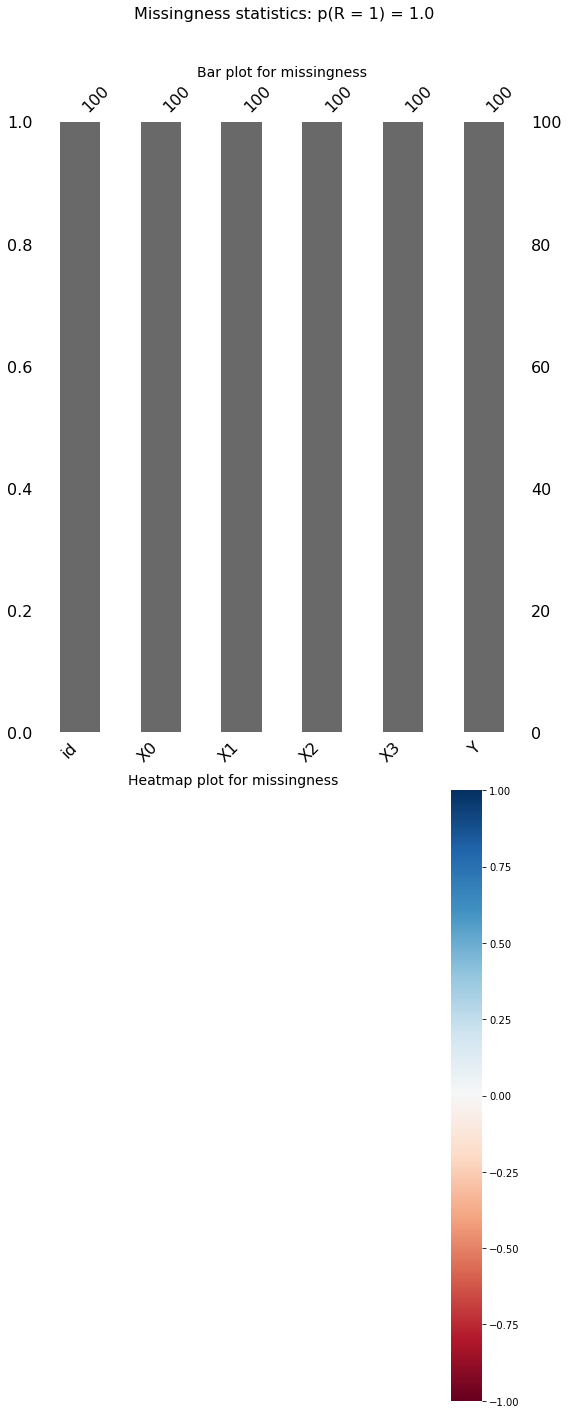

In [6]:
fig = dataset.plot_missingness_stats()

## Define missingness assumptions 

Note: If missingness is synthetic, you can simply copy the m_graph_adjacencies from m_graphs/ground_truth to m_graphs/

#### Option 1: Create missing data assumptions directly via a .csv file
__m-graph__:  
Fill a .csv file containing the edges in the m_graph
- column_names: name of the superfeature missingness indicators (superR) with format 'R_' + superfeature_name
- row_names: name of the features and then name of the superR
- entry(i,j) = 1  
    if node of index i has an arrow to node of column j 

#### Option 2: Define here and save
Define the adjacency matrix of the m_graph using a pandas df

In [10]:
from afa.data_modelling.missingness.missing_data_graph.utils import save_m_graph_adjacency_matrix
import pandas as pd
# missing data graph
m_graph_adj = pd.DataFrame([[1, 1], [0, 0], [0, 0], [0, 0], [0, 0]], 
                            index   = ['X0', 'X1', 'X2', 'X3' , 'R_superX0'], 
                            columns = ['R_superX1', 'R_superX2'])

save_m_graph_adjacency_matrix( m_graph_adj , m_graph_adj_file = paths_miss['miss_model_files']['m_graph_adj_file']  ) 
m_graph_adj

,R_superX1,R_superX2
X0,1,1
X1,0,0
X2,0,0
X3,0,0
R_superX0,0,0


## Test by loading missingness model

### Test 1: load missingness model by itself 

In [ ]:
# from afa.data_modelling.missingness.missing_data_graph.missing_data_graph_static import MissingDataGraph_static
# from afa.data_modelling.missingness.missing_data_graph.utils import load_m_graph_adjacency_matrix

In [ ]:
# m_graph_adj = load_m_graph_adjacency_matrix( m_graph_adj_file )
# m_graph = MissingDataGraph_static(m_graph_adj  = m_graph_adj ) 

In [ ]:
# visualize adjacency matrix 
# m_graph.m_graph_adj

In [ ]:
# m_graph.plot() 

### Test 2: load missingness model as part of dataset

In [12]:
# load dataset 
data_loader = DataLoader_static( data_file                  = paths_gt['data_file'],
                                 superfeature_mapping_file  = paths_gt['superfeature_mapping_file'],
                                 problem_file               = paths_gt['problem_file'],
                                 afa_problem_files          = paths_gt['afa_problem_files'],
                                 miss_model_files           = paths_miss['miss_model_files']
                               )
dataset = data_loader.load() 

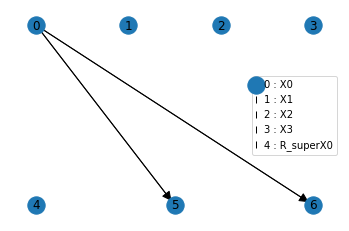

In [13]:
# Visualize the graph
fig = dataset.miss_model.m_graph.plot() 

## Reporting: summarize the whole dataset (with missingness assumptions) 
Store information in reports folder in latex / markdown format.

In [ ]:
# reporting
explanation_file = data_dir + 'dataset_description_with_miss_assumption'
dataset.explain(file=  explanation_file + '.md', format = 'markdown')
# dataset.explain(file=  explanation_file + '.tex', format = 'latex')